In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=4

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475333, 4, 16)
strides:  (512, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x223a3c2d040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475333,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x223b2451040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380266

In [9]:
training_sample

380266

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380266, 4, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380266,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380266, 4, 15) (380266, 1) (95067, 4, 15) (95067, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True),#activation='relu'),
    keras.layers.GRU(units=64),#activation='relu'),
    keras.layers.Dense(units=100,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 256)            209664    
                                                                 
 gru_1 (GRU)                 (None, 4, 128)            148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401,737
Trainable params: 401,737
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=300,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/300
2971/2971 [==============================] - 61s 18ms/step - loss: 0.5737 - accuracy: 0.7393 - val_loss: 0.5586 - val_accuracy: 0.7531
Epoch 2/300
2971/2971 [==============================] - 58s 19ms/step - loss: 0.5715 - accuracy: 0.7393 - val_loss: 0.5561 - val_accuracy: 0.7531
Epoch 3/300
2971/2971 [==============================] - 55s 19ms/step - loss: 0.5667 - accuracy: 0.7393 - val_loss: 0.5480 - val_accuracy: 0.7531
Epoch 4/300
2971/2971 [==============================] - 56s 19ms/step - loss: 0.5508 - accuracy: 0.7398 - val_loss: 0.5272 - val_accuracy: 0.7522
Epoch 5/300
2971/2971 [==============================] - 54s 18ms/step - loss: 0.5290 - accuracy: 0.7411 - val_loss: 0.5066 - val_accuracy: 0.7525
Epoch 6/300
2971/2971 [==============================] - 54s 18ms/step - loss: 0.5132 - accuracy: 0.7400 - val_loss: 0.4940 - val_accuracy: 0.7505
Epoch 7/300
2971/2971 [==============================] - 53s 18ms/step - loss: 0.5065 - accuracy: 0.7385 - val_loss: 0

2971/2971 [==============================] - 47s 16ms/step - loss: 0.4554 - accuracy: 0.7567 - val_loss: 0.4485 - val_accuracy: 0.7606
Epoch 57/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4551 - accuracy: 0.7570 - val_loss: 0.4503 - val_accuracy: 0.7589
Epoch 58/300
2971/2971 [==============================] - 49s 16ms/step - loss: 0.4548 - accuracy: 0.7571 - val_loss: 0.4483 - val_accuracy: 0.7614
Epoch 59/300
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4547 - accuracy: 0.7571 - val_loss: 0.4488 - val_accuracy: 0.7620
Epoch 60/300
2971/2971 [==============================] - 51s 17ms/step - loss: 0.4545 - accuracy: 0.7574 - val_loss: 0.4471 - val_accuracy: 0.7621
Epoch 61/300
2971/2971 [==============================] - 49s 16ms/step - loss: 0.4541 - accuracy: 0.7577 - val_loss: 0.4463 - val_accuracy: 0.7609
Epoch 62/300
2971/2971 [==============================] - 49s 16ms/step - loss: 0.4538 - accuracy: 0.7578 - val_loss: 0.4456 

2971/2971 [==============================] - 48s 16ms/step - loss: 0.4394 - accuracy: 0.7739 - val_loss: 0.4327 - val_accuracy: 0.7783
Epoch 112/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4391 - accuracy: 0.7739 - val_loss: 0.4340 - val_accuracy: 0.7777
Epoch 113/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4392 - accuracy: 0.7740 - val_loss: 0.4332 - val_accuracy: 0.7760
Epoch 114/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4389 - accuracy: 0.7742 - val_loss: 0.4320 - val_accuracy: 0.7778
Epoch 115/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4390 - accuracy: 0.7740 - val_loss: 0.4323 - val_accuracy: 0.7775
Epoch 116/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4387 - accuracy: 0.7745 - val_loss: 0.4354 - val_accuracy: 0.7768
Epoch 117/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4385 - accuracy: 0.7746 - val_loss: 0

2971/2971 [==============================] - 47s 16ms/step - loss: 0.4320 - accuracy: 0.7790 - val_loss: 0.4274 - val_accuracy: 0.7823
Epoch 167/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4319 - accuracy: 0.7790 - val_loss: 0.4264 - val_accuracy: 0.7826
Epoch 168/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4319 - accuracy: 0.7790 - val_loss: 0.4305 - val_accuracy: 0.7791
Epoch 169/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4318 - accuracy: 0.7786 - val_loss: 0.4289 - val_accuracy: 0.7812
Epoch 170/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4316 - accuracy: 0.7792 - val_loss: 0.4270 - val_accuracy: 0.7825
Epoch 171/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4317 - accuracy: 0.7792 - val_loss: 0.4294 - val_accuracy: 0.7822
Epoch 172/300
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4316 - accuracy: 0.7790 - val_loss: 0

2971/2971 [==============================] - 48s 16ms/step - loss: 0.4272 - accuracy: 0.7809 - val_loss: 0.4243 - val_accuracy: 0.7836
Epoch 222/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4271 - accuracy: 0.7812 - val_loss: 0.4277 - val_accuracy: 0.7824
Epoch 223/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4270 - accuracy: 0.7810 - val_loss: 0.4249 - val_accuracy: 0.7836
Epoch 224/300
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4270 - accuracy: 0.7812 - val_loss: 0.4260 - val_accuracy: 0.7835
Epoch 225/300
2971/2971 [==============================] - 49s 17ms/step - loss: 0.4269 - accuracy: 0.7814 - val_loss: 0.4277 - val_accuracy: 0.7828
Epoch 226/300
2971/2971 [==============================] - 49s 16ms/step - loss: 0.4269 - accuracy: 0.7811 - val_loss: 0.4237 - val_accuracy: 0.7839
Epoch 227/300
2971/2971 [==============================] - 49s 16ms/step - loss: 0.4267 - accuracy: 0.7813 - val_loss: 0

2971/2971 [==============================] - 42s 14ms/step - loss: 0.4234 - accuracy: 0.7832 - val_loss: 0.4271 - val_accuracy: 0.7837
Epoch 277/300
2971/2971 [==============================] - 42s 14ms/step - loss: 0.4234 - accuracy: 0.7830 - val_loss: 0.4226 - val_accuracy: 0.7851
Epoch 278/300
2971/2971 [==============================] - 42s 14ms/step - loss: 0.4233 - accuracy: 0.7831 - val_loss: 0.4235 - val_accuracy: 0.7826
Epoch 279/300
2971/2971 [==============================] - 42s 14ms/step - loss: 0.4232 - accuracy: 0.7829 - val_loss: 0.4243 - val_accuracy: 0.7835
Epoch 280/300
2971/2971 [==============================] - 42s 14ms/step - loss: 0.4232 - accuracy: 0.7832 - val_loss: 0.4233 - val_accuracy: 0.7831
Epoch 281/300
2971/2971 [==============================] - 42s 14ms/step - loss: 0.4232 - accuracy: 0.7835 - val_loss: 0.4257 - val_accuracy: 0.7804
Epoch 282/300
2971/2971 [==============================] - 42s 14ms/step - loss: 0.4231 - accuracy: 0.7834 - val_loss: 0

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 14s 4ms/step


In [25]:
stop=t.time()-start
print(stop)

14121.620250701904


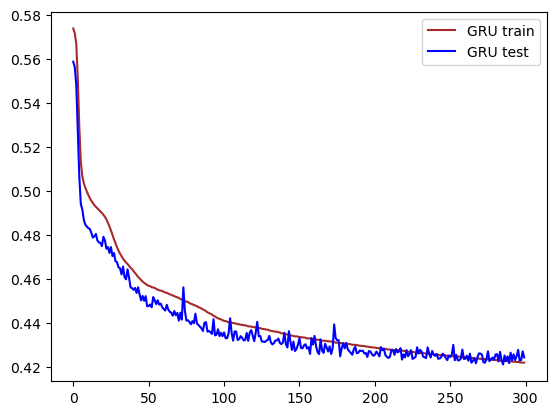

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95067, 1)

In [29]:
pred_y

array([[9.4432711e-05],
       [4.8355624e-04],
       [1.9813096e-03],
       ...,
       [8.2920760e-02],
       [8.4031157e-02],
       [8.6157627e-02]], dtype=float32)

In [30]:
pred_y=np.reshape(pred_y,95067)

0.1421889565577561
0.2353848197334648
0.3770795095967906
0.2895452953798452


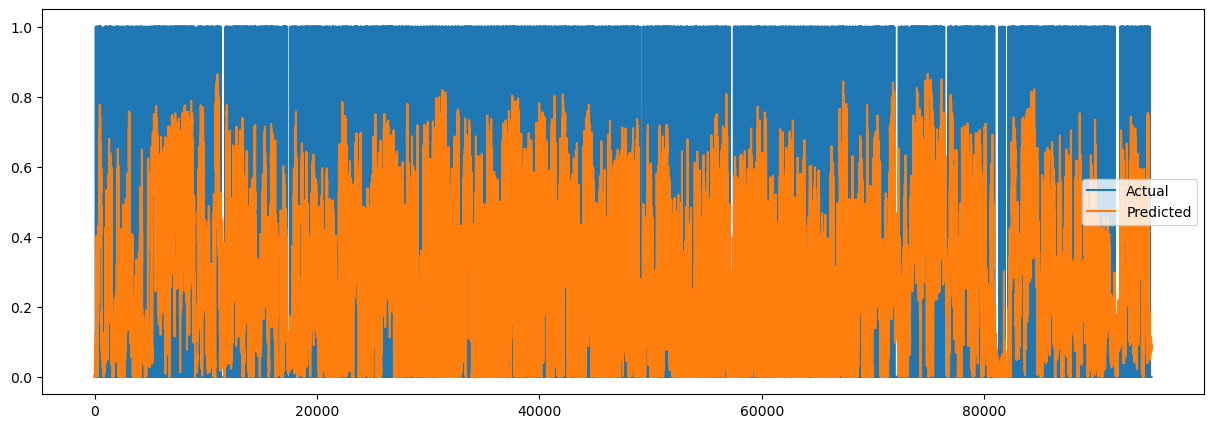

In [31]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380266, 4, 15)

In [33]:
np.shape(train_y)

(380266, 1)

In [34]:
np.shape(test_X)

(95067, 4, 15)

In [35]:
np.shape(test_y)

(95067, 1)

14855/14855 [==============================] - 63s 4ms/step


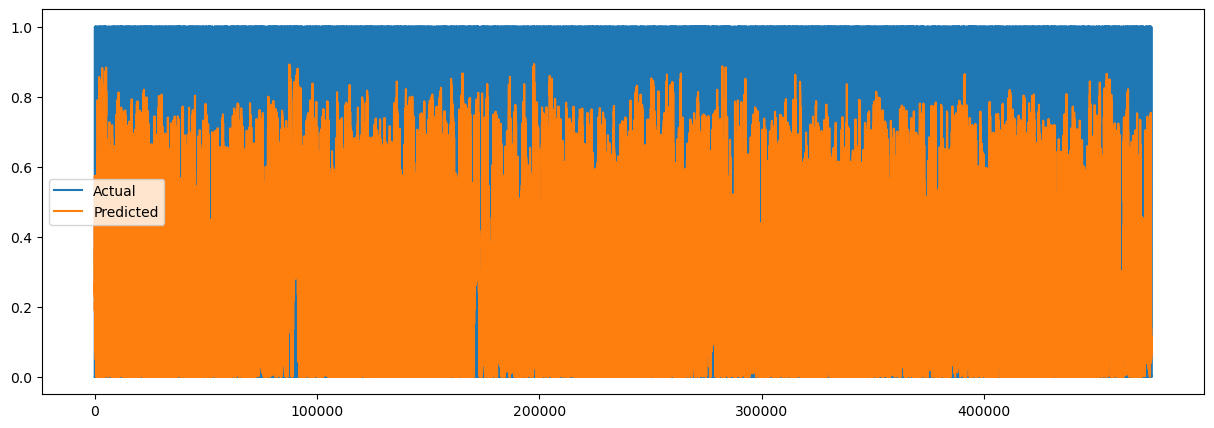

In [36]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

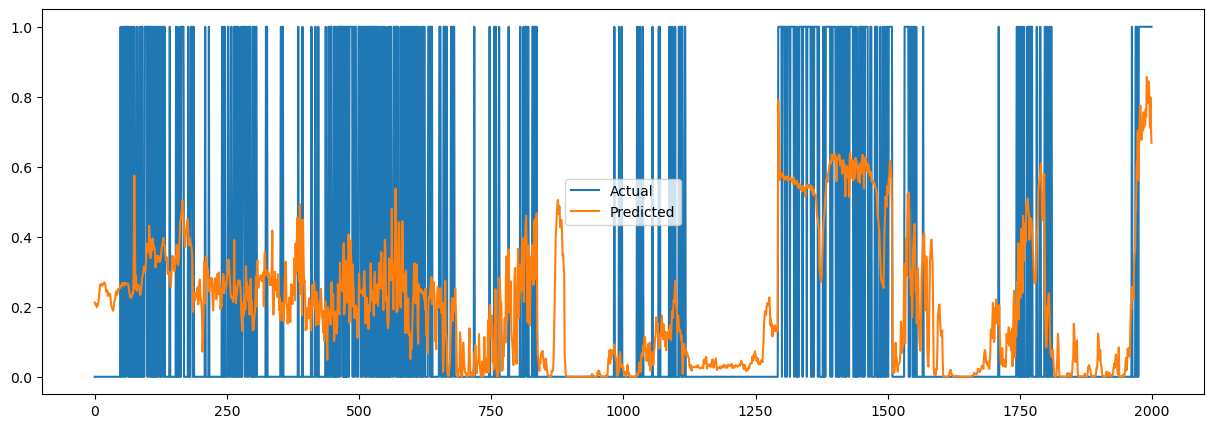

In [37]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25793917]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.60167394]
[0.83061875]
total acc [0.78371794]


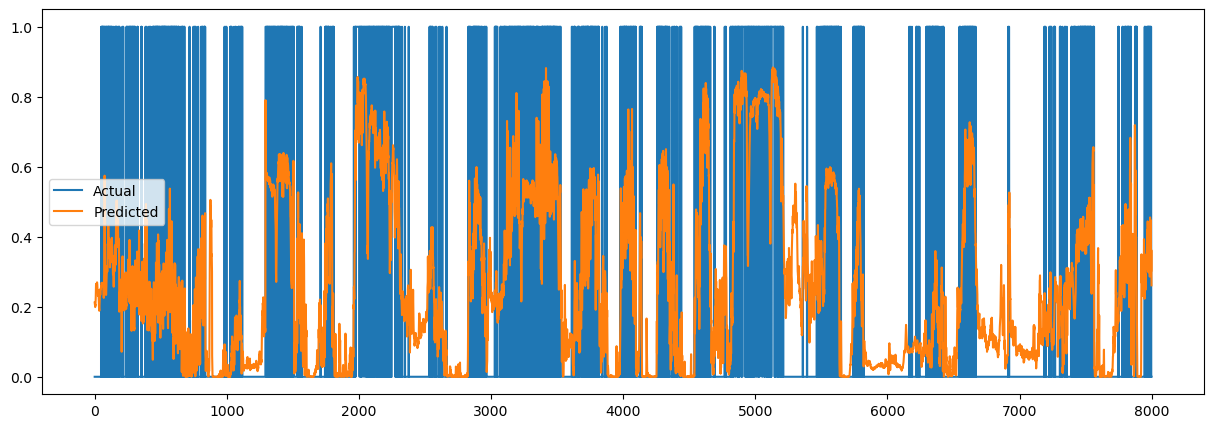

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

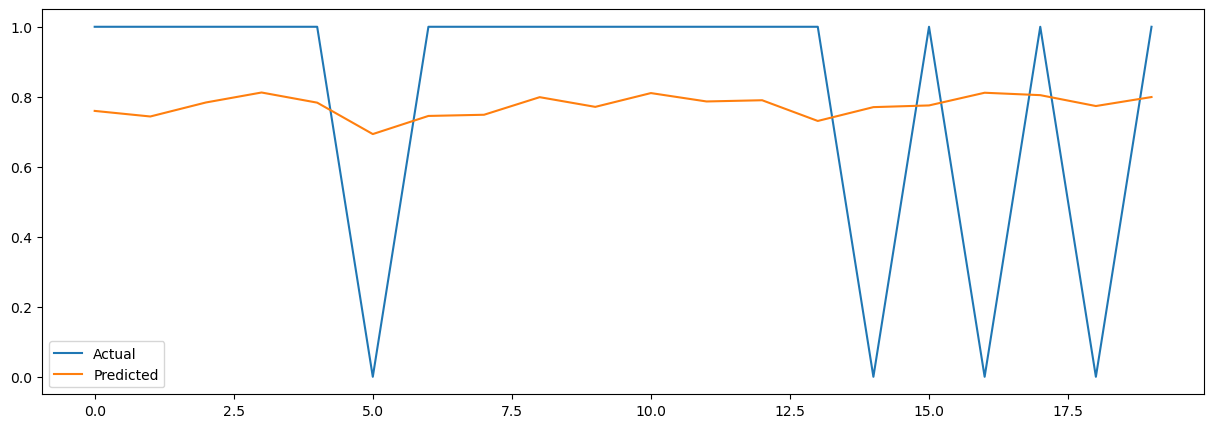

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

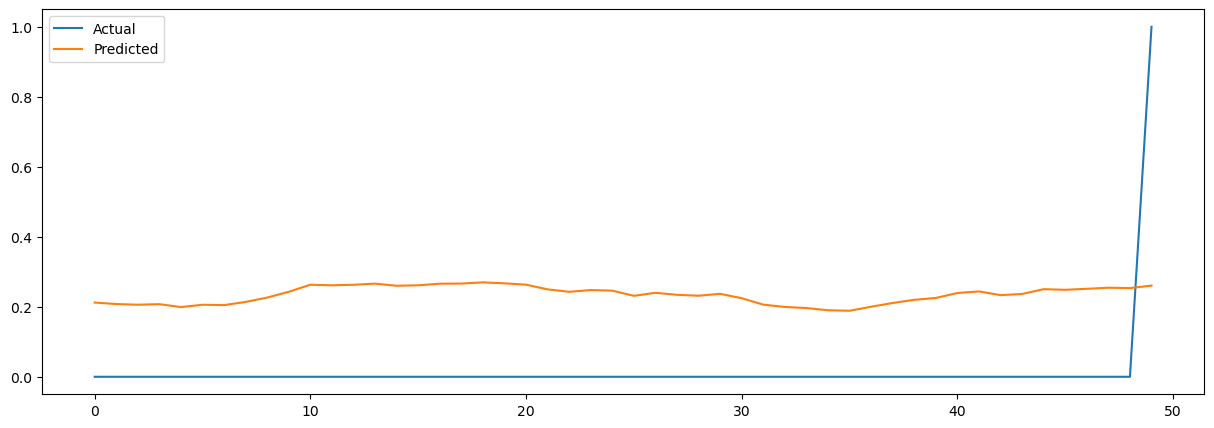

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

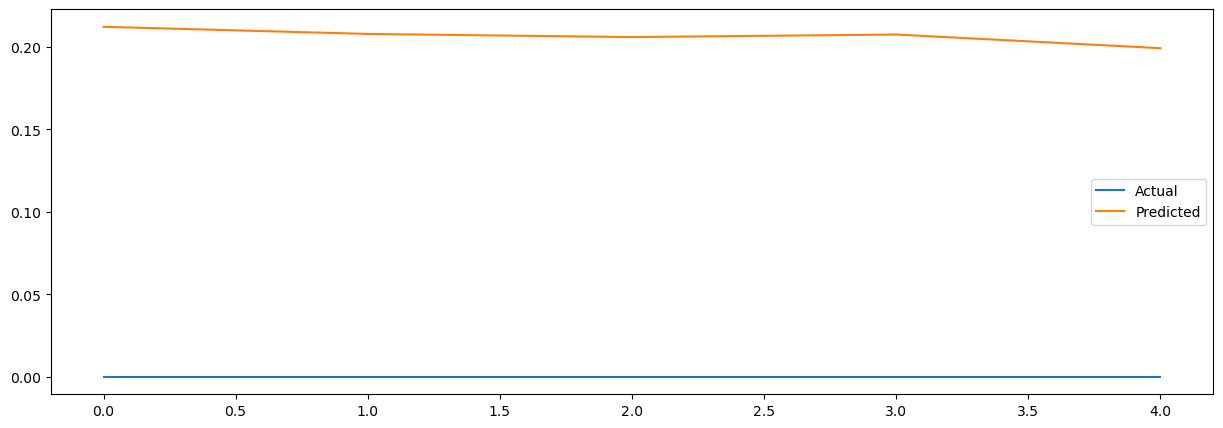

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()